# MGH Feta Dataset (2D)

In [1]:
import nibabel as nib
import tqdm
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import neurite as ne
import voxelmorph as vxm
from utils import *
import pathlib
import surfa as sf

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]
    
def crop_center_3D(img,cropx,cropy,cropz):
    y,x,z = img.shape
    
    if z < cropz:
        pad_width = cropz - z
        img = np.pad(img, ((0, 0), (0, 0), (0, pad_width)), mode='constant', constant_values=0)
        z = cropz
            
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    startz = z//2-(cropz//2)    
    return img[startx:startx+cropx,starty:starty+cropy,startz:startz+cropz]

def pad_to_original_dimensions(cropped_img, original_shape):
    padded_img = np.zeros(original_shape)  # Assuming the original shape is a tuple (dimx, dimy, dimz)
    y, x, z = cropped_img.shape

    startx = max((original_shape[0] - x) // 2, 0)
    starty = max((original_shape[1] - y) // 2, 0)
    startz = max((original_shape[2] - z) // 2, 0)

    endx = min(startx + x, original_shape[0])
    endy = min(starty + y, original_shape[1])
    endz = min(startz + z, original_shape[2])

    padded_img[starty:endy, startx:endx, startz:endz] = cropped_img[:endy-starty, :endx-startx, :endz-startz]

    return padded_img
    

# print(files,masks)
slice_norm = nib.load("mgh_2d/30_week_2__T2_Haste_Sag_mm_400_FOV.mgz")
masks_data = nib.load("mgh_2d/manual_b3_mom_100_30_week_2__T2_Haste_Sag_mm_400_FOV_segment.nii.gz").get_fdata()
slice_norm_data = slice_norm.get_fdata()
# print(slice_norm.shape)
orig_x , orig_y, orig_z = slice_norm.shape

2024-01-17 19:36:14.638028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/autofs/space/bal_004/users/jd1677/singularity-images/tensorflow_2.13.0-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Issue loading cv2


In [2]:
# !pip install surfa
# image = sf.load_volume('mgh_2d/30_week_2__T2_Haste_Sag_mm_400_FOV.mgz')
# vox_x, vox_y, vox_z = image.geom.voxsize
# resized = image.resize((1, 1, 1), method='linear')

In [3]:
num_col = 5
# num_slices = slice_norm.shape[2]
num_slices = slice_norm_data.shape[2]
num_row = num_slices // num_col + int(num_slices % num_col > 0)
dimx = 256
dimy=256
dimz=256
# Creating a nested loop for plotting
slices=[]
masks=[]
for i in range(num_slices):

    crop_img = crop_center(slice_norm_data[:, :, i], dimx, dimy)
    
    min_value = np.min(crop_img)
    max_value = np.max(crop_img)
    crop_img = (crop_img - min_value) / (max_value - min_value)
    slices.append(crop_img.tolist())  # Convert to list to store as 256 by 256 images
    
    mask = crop_center(masks_data[:, :, i], dimx, dimy)
    mask = (mask > 0).astype(np.float32)  # Binarize the mask
    masks.append(mask.tolist())
    
# for i in range(num_row):
#     slice_start = i * num_col
#     slice_end = min((i + 1) * num_col, num_slices)
#     ne.plot.slices(slices_in=([slices[j] for j in range(slice_start, slice_end)]), cmaps=['gray'] * (slice_end - slice_start))
#     ne.plot.slices(slices_in=([masks[j] for j in range(slice_start, slice_end)]), cmaps=['gray'] * (slice_end - slice_start))


models_feta_mom_brain_params_16_16_32_32_64_64_64_64_64_64_64_64_64_64_nc_2_bs_1
range(0, 16)


2024-01-17 19:36:22.258937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-17 19:36:22.258998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: tebo.nmr.mgh.harvard.edu
2024-01-17 19:36:22.259013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: tebo.nmr.mgh.harvard.edu
2024-01-17 19:36:22.259169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-01-17 19:36:22.259207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.54.3


(None, 256, 256, 1)
(None, 256, 256, 1)
#### 2
Loaded weights from the checkpoint and continued training.


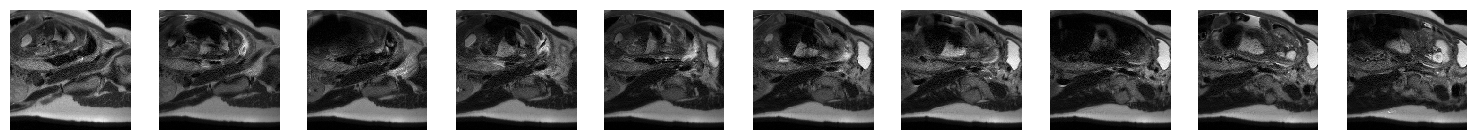

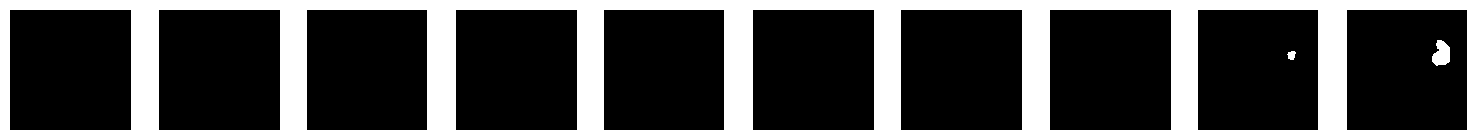

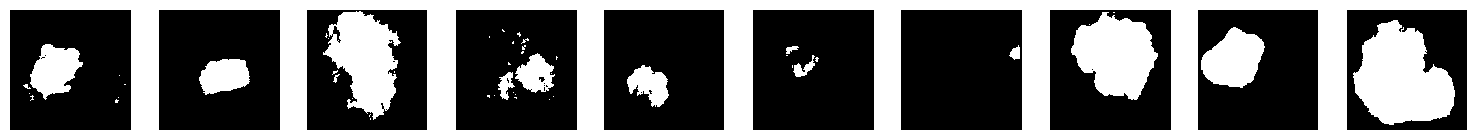

    0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0001


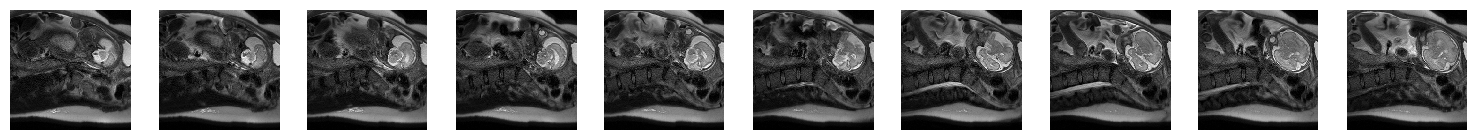

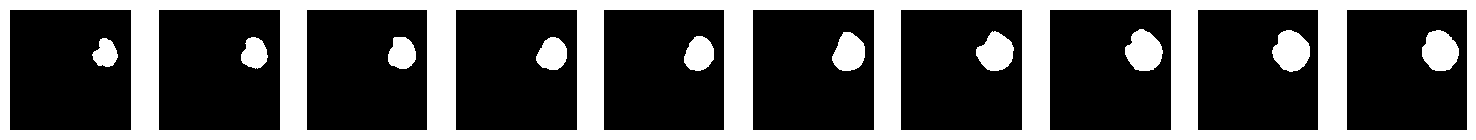

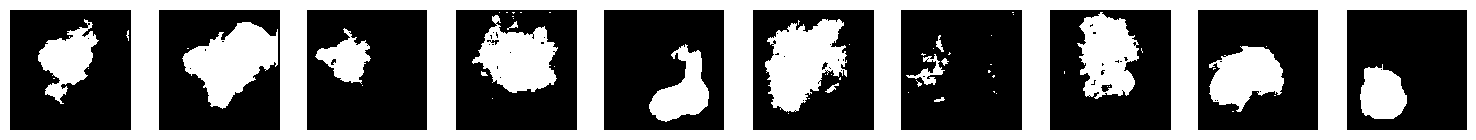

    0.0013          0.2359          0.0000          0.1536          0.1925          0.0807          0.0042          0.0957          0.0085          0.0000


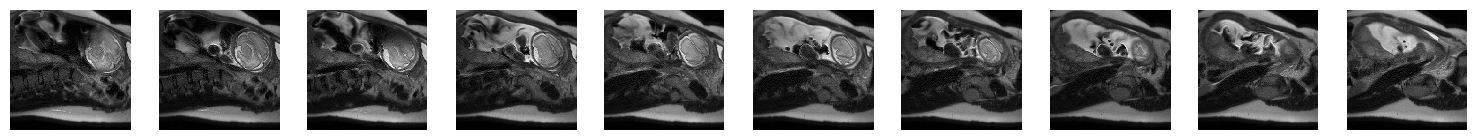

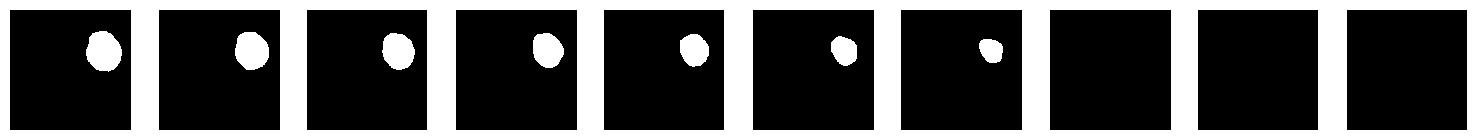

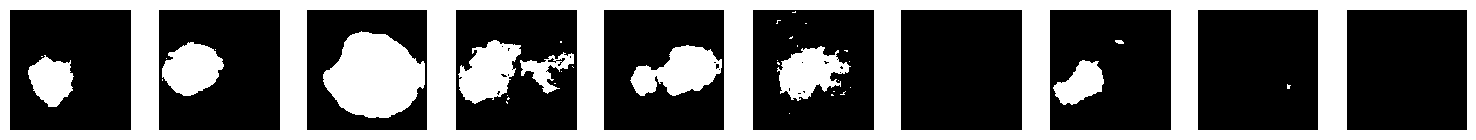

    0.0000          0.0000          0.1868          0.0677          0.2577          0.0425          0.0000          0.0000          0.0000          nan


In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import tensorflow as tf
from tensorflow.keras.models import Model
from neurite.tf import models  # Assuming the module's location
import voxelmorph.tf.losses as vtml
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
import neurite as ne
import sys
import nibabel as nib
from tensorflow.keras.models import load_model
from neurite_sandbox.tf.models import labels_to_labels

tf.get_logger().setLevel('ERROR')

warp_blur_min=np.array([2, 4, 8])
bias_blur_min=np.array([2, 4, 8])
bias_blur_max=bias_blur_min*2

en=[16,32,64,64,64,64,64]
de=[64,64,64,64,64,32,16,2]

en=[16,16, 32,32, 64,64,128,128, 256,256]
de=[256,256, 128,128,64,64,32,32,16,16,2]

en=[16,16, 32,32, 64,64, 64,64, 64, 64,64, 64,64, 64]
de=[64,64, 64,64, 64, 64,64, 64,64, 64,32,32,16,16,2]

# en=[128,128,128,128,128]
# de=[128,128,128,128,128,2]
sc=0.7

nb_features = '_'.join(map(str, en))
log_dir='logs_feta'
models_dir='models_feta_mom_brain_params_'+str(nb_features)+"_nc_2_bs_1"
print(models_dir)
initial_epoch=240
checkpoint_path=models_dir+'/weights_epoch_'+str(initial_epoch)+'.h5'

num_labels=8
data_dir = 'feta_2d/'

feta = pathlib.Path('/autofs/space/bal_004/users/jd1677/synthstrip/feta_2d')
files = list(feta.glob('sub-???/sub-???_dseg.nii.gz'))
label_maps = [np.uint8(f.dataobj) for f in map(nib.load, files)]
labels = np.unique(label_maps)

labels_in = range(max(labels) + num_labels + 1)

print(labels_in)
import numpy as np



random.seed(3000)

def load_model(checkpoint_path,num_dim=2,nb_labels=2,
                                            dimx=256,
                                            dimy=256,
                                            dimz=256,
                                            nb_features=64,
                                            batch_size=8,
                                            warp_max=2.5,
                                            warp_min=.5,
                                            warp_blur_min=np.array([2, 4, 8]),
                                            warp_blur_max=warp_blur_min*2,
                                            bias_blur_min=np.array([2, 4, 8]),
                                            bias_blur_max=bias_blur_min*2,
                                            initial_lr=1e-4,
                                            lr = 1e-4,
                                            lr_lin = 1e-4,
                                            nb_levels=5,
                                            conv_size=3,
                                            num_epochs=40000,
                                            num_bg_labels=16,
                                            nb_conv_per_level=2):
    if num_dim==2:
        input_img = Input(shape=(dimx, dimy,1))
        labels_to_image_model = ne.models.labels_to_image_new(
            in_shape=(dimx, dimy),
            labels_in=labels_in,
            labels_out={f: 1 if f in (1, 2, 3, 4, 5, 6, 7) else 0 for f in labels_in},
            aff_shift=30,
            aff_rotate=180,
            aff_shear=0.1,
            blur_max=3.4,
            slice_prob=1,
            crop_prob=1,
        )
        
        unet_model = vxm.networks.Unet(inshape=(dimx, dimy, 1), nb_features=[en, de], 
                                       nb_conv_per_level=nb_conv_per_level,
                                       final_activation_function='softmax')

    elif num_dim==3:
        input_img = Input(shape=(dimx, dimy, dimz, 1))
        labels_to_image_model = ne.models.labels_to_image_new(
            in_shape=(dimx, dimy,dimz),
            labels_in=labels_in,
            labels_out={f: 1 if f in (1, 2, 3, 4, 5, 6, 7) else 0 for f in labels_in},
            aff_shift=30,
            aff_rotate=180,
            aff_shear=0.1,
            blur_max=3.4,
            slice_prob=1,
            crop_prob=1,
        )
        
        unet_model = vxm.networks.Unet(inshape=(dimx, dimy, dimz, 1), nb_features=(en, de), 
                                       nb_conv_per_level=nb_conv_per_level,
                                       final_activation_function='softmax')
        # input_img = Input(shape=(dimx, dimy))
    print("####",num_dim)
    generated_img, y = labels_to_image_model(input_img)

    segmentation = unet_model(generated_img)
    combined_model = Model(inputs=input_img, outputs=segmentation)
    combined_model.add_loss(soft_dice(y, segmentation))

    combined_model.compile(optimizer=Adam(learning_rate=initial_lr))
    if os.path.exists(checkpoint_path):
        combined_model.load_weights(checkpoint_path)
        print("Loaded weights from the checkpoint and continued training.")
    else:
        print("Checkpoint file not found.")
    return combined_model

combined_model = load_model(checkpoint_path,num_dim=2)

num_row = 3
per_row = 10

def process_image(im,unet_model):
    im = tf.expand_dims(im, axis=0)  # Adding a batch dimension at axis 0
    im = tf.expand_dims(im, axis=-1)  # Adding another dimension at the end (assuming it's a single-channel image)

    predictions = unet_model.predict(im, verbose=0)
    predictions_argmax = np.argmax(predictions, axis=-1)
    return predictions_argmax

def calculate_dice_coefficient(ground_truth, predicted):
    intersection = np.sum(np.logical_and(ground_truth, predicted))
    union = np.sum(np.logical_or(ground_truth, predicted))

    dice_coefficient = (2.0 * intersection) / (union + intersection)
    return dice_coefficient

def print_row_dice_coefficients(i, row_dice_coefficients):
    formatted_dice = [f"   {dice:.4f}" for j, dice in enumerate(row_dice_coefficients)]
    num_spaces = num_row-1
    padding_left = 0
    padding_right = 0

    formatted_output = f"{' ' * padding_left}{'       '.join(formatted_dice)}{' ' * padding_right}"
    print(f' {formatted_output}')
    
for i in range(0, num_row * per_row, per_row):
    # cur_slices = [slices[i:i+per_row] for i in range(0, len(slices), per_row)]
    cur_slices = slices[i:i+per_row]
    cur_masks = masks[i:i+per_row]

    predictions = [process_image(im, combined_model) for im in cur_slices]

    ne.plot.slices(cur_slices, cmaps=['gray'])
    ne.plot.slices(cur_masks, cmaps=['gray'])
    ne.plot.slices(predictions, cmaps=['gray'])
    # print(j,len(cur_masks),per_row)
    row_dice_coefficients = [calculate_dice_coefficient(cur_masks[j], predictions[j]) for j in range(len(cur_masks))]
    print_row_dice_coefficients(i, row_dice_coefficients)


In [5]:
combined_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 model_1 (Functional)        [(None, 256, 256, 1),        0         ['input_1[0][0]']             
                              (None, 256, 256, 2)]                                                
                                                                                                  
 unet (Unet)                 (None, 256, 256, 2)          942226    ['model_1[0][0]']             
                                                                                                  
 tf.math.pow_1 (TFOpLambda)  (None, 256, 256, 2)          0         ['model_1[0][1]']       

# MGH Feta Dataset (3D)

In [6]:
mgh = pathlib.Path('example/')
files = list(mgh.glob('mom_???_*/*.mgz'))
masks = list(mgh.glob('mom_???_*/manual*nii.gz'))
all_slice_norms = [nib.load(f).get_fdata() for f in files]
all_masks = [nib.load(f).get_fdata() for f in masks]

In [14]:
# log_dir='logs_feta'
initial_epoch=120
en=[16,16, 32,32, 64,64,128,128, 256,256]
de=[256,256, 128,128,64,64,32,32,16,16,2]

nb_features = '_'.join(map(str, en))
dim_=256
sc=0.9
models_dir='models_synth_mom_brain_params_dim_'+str(dim_)+'_'+str(nb_features)+"_nc_2_bs_1_sc_"+str(sc)
checkpoint_path=models_dir+'/weights_epoch_'+str(initial_epoch)+'.h5'
print(checkpoint_path)
combined_model = load_model(checkpoint_path,num_dim=3, dimx=dim_,
                                                       dimy=dim_,
                                                       dimz=dim_)


models_synth_mom_brain_params_dim_256_16_16_32_32_64_64_128_128_256_256_nc_2_bs_1_sc_0.9/weights_epoch_120.h5
(None, 256, 256, 256, 1)
(None, 256, 256, 256, 1)
#### 3
Loaded weights from the checkpoint and continued training.


In [13]:
from utils import resize
def process_image(im,unet_model):
    im = tf.expand_dims(im, axis=0)  # Adding a batch dimension at axis 0
    im = tf.expand_dims(im, axis=-1)  # Adding another dimension at the end (assuming it's a single-channel image)
    # print(im.shape)
    predictions = unet_model.predict(im, verbose=0)
    predictions_argmax = np.argmax(predictions, axis=-1)
    return predictions_argmax
    

def minmax_norm(x):
    x = np.asarray(x,  dtype=np.float64)
    # x=x.astype(np.float32)
    x_min = np.min(x)
    x_max = np.max(x)#, axis=axis, keepdims=True)
    return (x - x_min) / (x_max - x_min)

    # return np.divide(x - x_min, x_max - x_min, out=np.zeros_like(x, dtype=np.float32), where=(x_max - x_min) != 0)

def minmax_norm2(x, axis=None):
    x_min = np.min(x, axis=axis, keepdims=True)
    # print(x_min.shape)
    x_max = np.max(x, axis=axis, keepdims=True)
    return np.divide(x - x_min, x_max - x_min, out=np.zeros_like(x, dtype=np.float64), where=(x_max - x_min) != 0)

def minmax_norm3(x, axis=None):
    x_min = np.min(x, axis=axis, keepdims=True).astype(np.float32)
    # print(x_min.shape)
    x_max = np.max(x, axis=axis, keepdims=True).astype(np.float32)
    return np.divide(x - x_min, x_max - x_min, out=np.zeros_like(x, dtype=np.float32), where=(x_max - x_min) != 0)

def minmax_norm4(x, axis=None):
    x_min = np.min(x, axis=axis, keepdims=True)
    # print(x_min.shape)
    x_max = np.max(x, axis=axis, keepdims=True)
    return np.divide(x - x_min, x_max - x_min, out=np.zeros_like(x, dtype=np.float32), where=(x_max - x_min) != 0)


# def minmax_norm2(matrix):
#     min_val = np.min(matrix)
#     max_val = np.max(matrix)

#     scaled_matrix = (matrix - min_val) / (max_val - min_val)
#     return scaled_matrix


# image = sf.load_volume('mgh_2d/36_week_2__T2_Haste_Sag_mm_400_FOV.mgz')
# image = sf.load_volume('mgh_2d/30_week_2__T2_Haste_Sag_mm_400_FOV.mgz')
# image = sf.load_volume('mgh_2d/19_week_4__body_T2_Hast_mm_400_FOV.mgz')
# image = sf.load_volume('mgh_2d/28_week_2__T2_Haste_Sag_mm_400_FOV.mgz')
# image = sf.load_volume('mgh_2d/22_week_2__body_T2_Hast_mm_400_FOV.mgz')
# image = sf.load_volume('mgh_2d/sub-001_rec-mial_T2w.nii.gz')
image = sf.load_volume('output/example_image_epoch.nii.gz')
use_sf_norm=False
output_folder = 'output'
output_file_path = os.path.join(output_folder, 'prediction.nii.gz')

# 1)

crop_img = image#.resize([0.54689997, 0.54689997, 0.54689997]).reshape((dim_ , dim_ , dim_))#.resize([1.0,1.0,1.0])#.reshape((dim_ , dim_ , dim_))#.resize([1.0,1.0,1.0])

crop_img.save("output/crop_img.mgz")

# crop_img.save("output/crop_img.mgz")
# 2)

crop_data= minmax_norm(crop_img.data)#.astype(np.float64))

# 3)
prediction1 = process_image(crop_data, combined_model)
prediction = np.squeeze(prediction1, axis=0)

# 4)
pred = crop_img.new(prediction)

# 5)
conformed = pred.resample_like(image)
conformed.astype(np.int32).save(output_file_path)


In [15]:
image.geom.voxsize

array([1., 1., 1.])

In [188]:
pred.astype(np.int32).save(output_file_path)

# from nilearn import image, plotting
# import numpy as np

# # Load the image
# image_path = 'mgh_2d/sub-001_rec-mial_T2w.nii.gz'
# img = image.load_img(image_path)

# # Save the cropped image
# output_folder = 'output'
# # crop_img_path = os.path.join(output_folder, 'crop_img.nii.gz')
# # img.to_filename(crop_img_path)

# # Normalize the cropped image
# crop_data =  minmax_norm(img.get_fdata())#(img.get_fdata() - img.get_fdata().min()) / (img.get_fdata().max() - img.get_fdata().min())

# # Process the image using combined_model (assuming combined_model is defined)
# prediction1 = process_image(crop_data, combined_model)
# prediction = np.squeeze(prediction1, axis=0)

# # Create a new nifti image from the prediction
# # pred_img = image.new_img_like(img, prediction.astype(np.float32))

# output_file_path = os.path.join(output_folder, 'prediction.nii.gz')
# prediction_img = image.new_img_like(img, prediction.astype(np.int32), img.affine, img.header)
# prediction_img.to_filename(output_file_path)
# # a=minmax_norm2(crop_img.data)
# # b=minmax_norm4(crop_img.data)
# # print(np.sum(a),np.sum(b))
# # print(type(crop_data),crop_data.shape,np.max(crop_data))
# # print(np.sum(pred))
# # print(np.sum(crop_img.data),np.sum(crop_img.data.astype(np.float32)))

In [156]:
# prediction = crop_img.data> 0 #process_image(crop_data, combined_model)
# prediction = np.squeeze(prediction, axis=0)
print(np.sum(prediction))
# 4)
# pred = image.new(prediction)

# # 5)
# conformed = pred.resample_like(crop_img)
# conformed.astype(np.int32).save(output_file_path)

638109


In [90]:
# prediction_ = crop_data> 0 #process_image(crop_data, combined_model)
# def process_image(im,unet_model):
#     im = tf.expand_dims(im, axis=0)  # Adding a batch dimension at axis 0
#     im = tf.expand_dims(im, axis=-1)  # Adding another dimension at the end (assuming it's a single-channel image)
#     predictions = unet_model.predict(im, verbose=0)
#     predictions_argmax = np.argmax(predictions, axis=-1)
#     # print(predictions_argmax.dtype)
#     return predictions_argmax
# prediction = process_image(crop_data, combined_model)
# # prediction = np.squeeze(prediction, axis=0)

pred_=sf.Volume(prediction)
pred_ = crop_img.new(pred_)
conformed = pred_.resample_like(image)
conformed.astype(np.int32).save(output_file_path)

In [116]:
conformed = pred.resample_like(image)

conformed.astype(np.uint32).save(output_file_path)

In [73]:
a= crop_img.data.astype(np.float64)
b = crop_img.data

In [88]:
# np.sum(prediction1)
prediction.shape
# print(np.sum(a),np.sum(b),a.shape,b.shape)

(192, 192, 192)

In [71]:
# crop_data1= minmax_norm2(crop_img.data)
# a = crop_img.data
# print(np.sum(a),np.sum(crop_img.data.astype(np.float64)))
np.mean(crop_img.mean())

116.43996443571868

In [61]:
type(crop_img)

surfa.image.framed.Volume

In [160]:
image = sf.load_volume('mgh_2d/sub-001_rec-mial_dseg.nii.gz')

In [161]:
image.geom.voxsize

array([0.54689997, 0.54689997, 0.54689997])

In [165]:
label_maps = [np.uint8(sf.load_volume(str(file_path)).reshape((dimx, dimy, dimz)).data) for file_path in files]


In [166]:
a= label_maps[0]

In [170]:
np.max(a)

7

In [1]:
import pathlib
import surfa as sf
import nibabel as nib
from tensorflow.keras.models import load_model
import numpy as np
from utils import draw_shapes


feta = pathlib.Path('/autofs/space/bal_004/users/jd1677/synthstrip/feta_3d')
files = list(feta.glob('sub-???/anat/sub-???_rec-mial_dseg.nii.gz'))
# label_maps = [np.uint8(f.dataobj) for f in map(nib.load, files)]
    
num_labels = 8
num_shapes = 3

label_maps = [np.uint8(sf.load_volume(str(file_path)).data) for file_path in files]
label_maps = label_maps[0:2]

labels = np.unique(label_maps)
in_shape = label_maps[0].shape

2024-01-18 10:51:44.508428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Issue loading cv2


In [5]:


# shapes = [draw_shapes(in_shape, num_labels) for _ in range(num_shapes)]
# shapes = map(np.squeeze, shapes)
# shapes = map(np.uint8, shapes)
# shapes = [f + max(labels) + 1 for f in shapes]

from utils import generator3D
# gen = generator3D(label_maps, shapes,0.2)
gen = generator3D_noshape(label_maps)

example_image = next(gen)[0, ..., 0]
nifti_img = nib.Nifti1Image(example_image, affine=np.eye(4))  # Assuming identity affine for simplicity
save_path = f'output/example_image_epoch2.nii.gz'
nib.save(nifti_img, save_path)

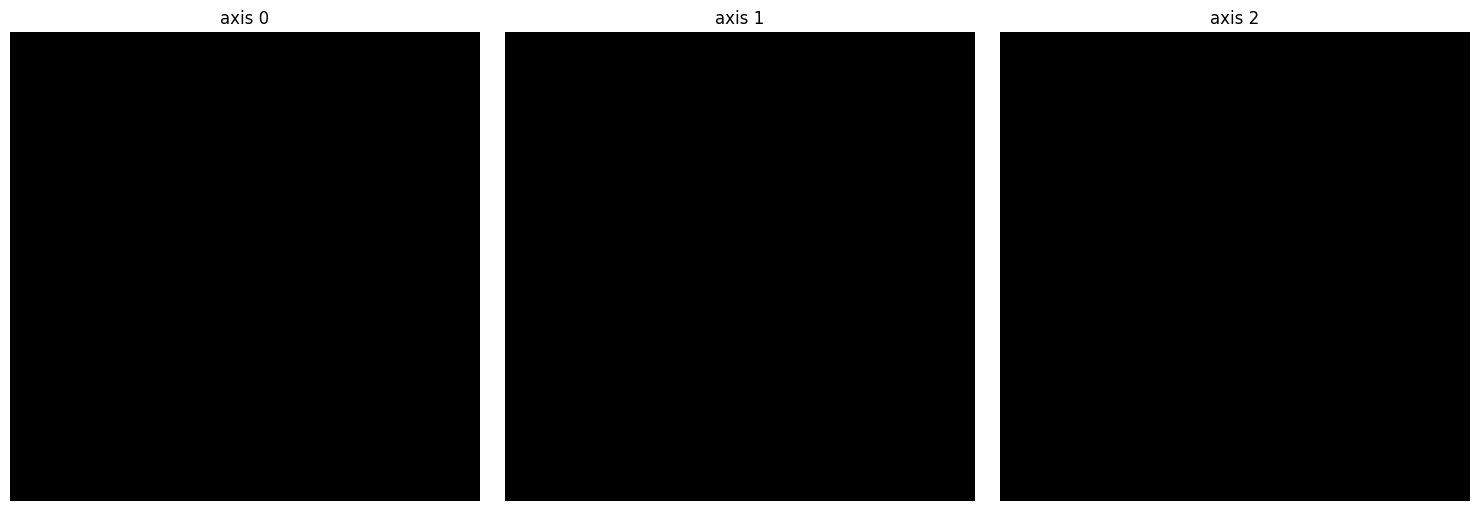

In [6]:
# example_image.shape
import neurite as ne

ne.plot.volume3D(example_image);


In [7]:
import neurite as ne
from utils import generator3D_noshape

# gen = generator3D(label_maps, shapes,0.2)
gen = generator3D_noshape(label_maps)
labels_in = range(max(labels) + num_labels + 1)

model_gen = ne.models.labels_to_image_new(
    in_shape=in_shape,
    labels_in=labels_in,
    labels_out={f: 1 if f in (1, 2, 3, 4, 5, 6, 7) else 0 for f in labels_in},
    aff_shift=30,
    aff_rotate=180,
    aff_shear=0.1,
    blur_max=3.4,
    slice_prob=1,
    crop_prob=1,
)


# Test repeatedly on the same input.
num_gen = 1
input = next(gen)#[0, ..., 0]
images, one_hot = zip(*[model_gen.predict(input, verbose=0) for _ in range(num_gen)])

nifti_img = nib.Nifti1Image(images[0], affine=np.eye(4))  # Assuming identity affine for simplicity
save_path = f'output/example_image_epoch2.nii.gz'
nib.save(nifti_img, save_path)

# Example images and structures to align.


(None, 256, 256, 256, 1)
(None, 256, 256, 256, 1)


In [12]:
a = np.squeeze(images[0], axis=(0, -1))
nifti_img = nib.Nifti1Image(a, affine=np.eye(4))  # Assuming identity affine for simplicity
save_path = f'output/example_image_epoch2.nii.gz'
nib.save(nifti_img, save_path)

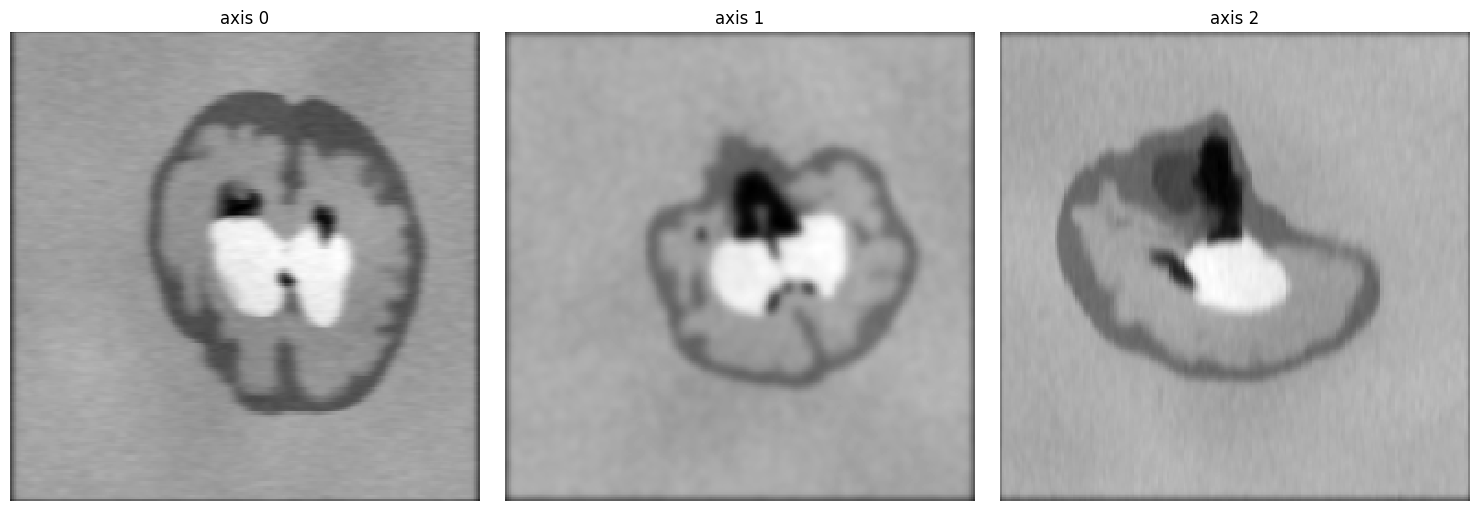

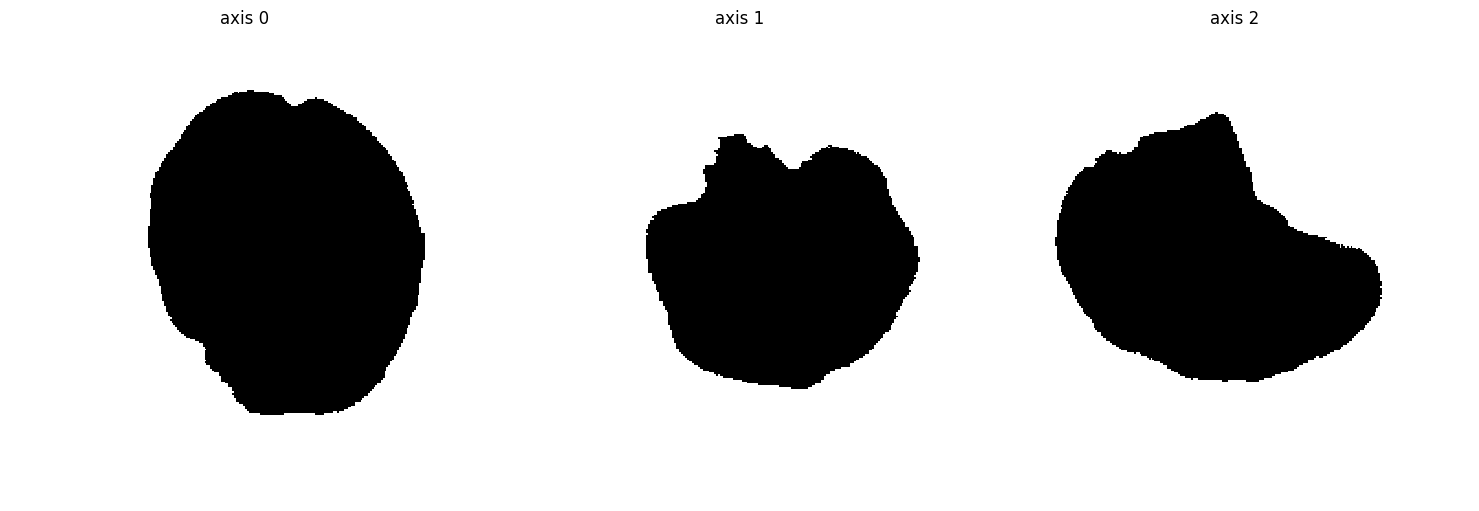

In [8]:
# ne.plot.slices3D(images)

for i in range(images[0].shape[-1]):
    # ne.plot.volume3D(images, cmaps=['gray'])

    ne.plot.volume3D([f[..., i] for f in images]);
    ne.plot.volume3D([f[..., i] for f in one_hot]);
    
# for i in range(one_hot[0].shape[-1]):
#     # ne.plot.volume3D(images, cmaps=['gray'])

#     ne.plot.volume3D([f[..., i] for f in one_hot]);

In [17]:
# len(images)
in_shape = label_maps[0].shape


In [18]:
in_shape

(256, 256, 256)

In [35]:
argmax_slice = np.argmax(one_hot[0], axis=-1).astype(np.int32)
argmax_slice = np.squeeze(argmax_slice,axis=0)
nifti_img = nib.Nifti1Image(argmax_slice, affine=np.eye(4))  # Assuming identity affine for simplicity
nib.save(nifti_img, "output/example_mask.nii.gz")

In [38]:
a=np.squeeze(images[0],axis=-1)
a=np.squeeze(a,axis=0)
nifti_img = nib.Nifti1Image(a, affine=np.eye(4))  # Assuming identity affine for simplicity
nib.save(nifti_img, "output/example_image_epoch.nii.gz")

In [37]:
images[0].shape

(1, 256, 256, 256, 1)

In [42]:
# nifti_img.get_fdata()